# Adult Income Dataset

## Loading the Libraries


In [1]:
import warnings 
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')

# Load The Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Opicha\Downloads\adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:-

    The dataset contains absolutely no null values!
    Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
    There are no Float Datatypes in the dataset.
    Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
    Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of '?' values in our dataset. We will have to replace those values!

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Observation:-

    The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
    The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
    While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
    The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [6]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observation:-

    We can see that the columns workclass, occupation, and native.country contains null values. We would have to find out a way to deal with them!
    There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!


In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Explorative Data Analsyis

    Prediction task is to determine whether a person makes over 50K a year

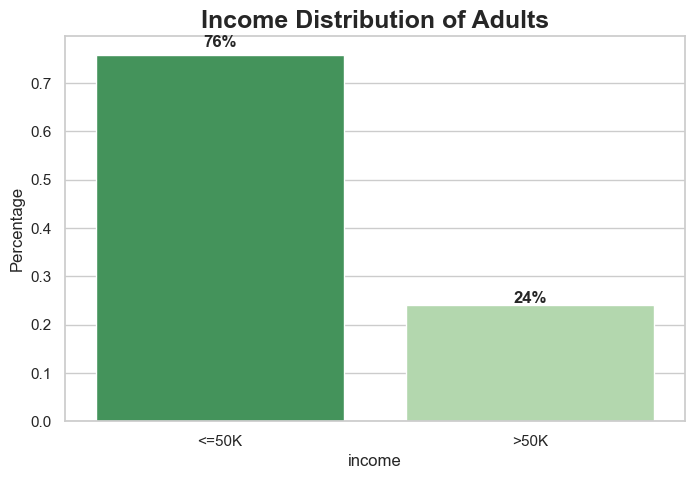

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

Observation:-

    In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!

    The number of people earning more than 50K dollars an year is one third of the people earning less than it.
    We should also keep in mind that this data was collected in 1996, so 50K dollars of that tme, might not be the same in today's time!

In [20]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


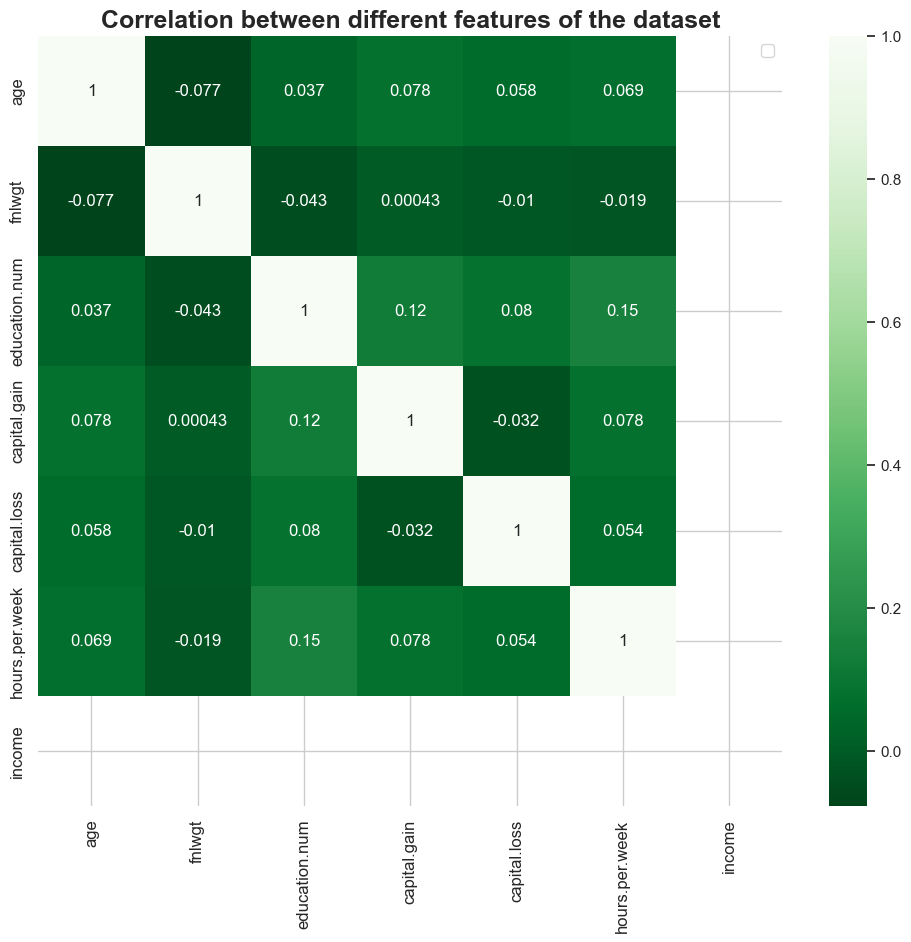

In [21]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df.corr(), cmap = 'Greens_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
plt.legend(fontsize=12)

Observation:-

    Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

    We see that most of the features are positively correlated with the Income Variable.
    An important thing to note over here is that, we have not covered the object datatypes in this correlation graph.

In [22]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

#Combining the lower grades of education together

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [23]:
df.drop('age_group', inplace = True, axis = 1)

# Data Modelling and Machine Learning

    Here, I'll be using Logistic Regression Model and try to build it from scratch.

    I will then do the same by using Scikit-learn package and see if there's a major difference in the accuracy!

In [24]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
    
from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

About Logistic Regression:-

    Before we start coding let us first understand or atleast try to understand the things happening at the back-end of Scikit Learn's Logistic Regression. The aim of this section is to explain the math behind Logistic Regression and to accomplish the first objective of this kernel.

    To be able to do this we must answer the question, how does a Logistic Regression work? In theory, a Logistic regression takes input and returns an output of probability, a value between 0 and 1. How does a Logistic Regression do that? With the help of a function called a logistic function or most commonly known as a sigmoid. This sigmoid function is reponsible for predicting or classifying a given input.


In [26]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [28]:
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

ValueError: Input y contains NaN.

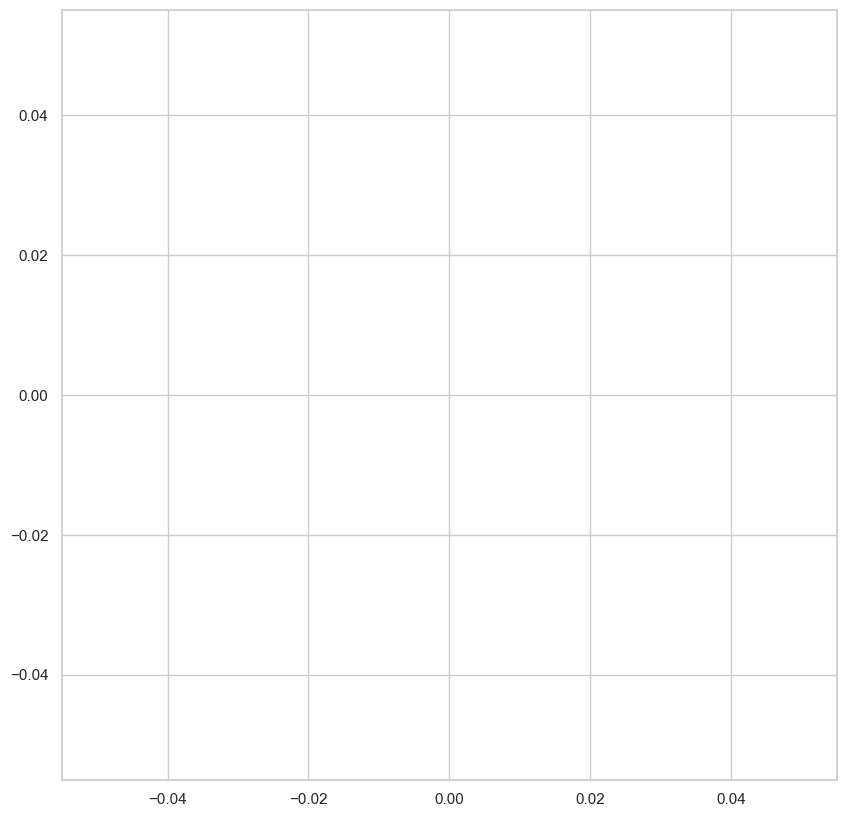

In [29]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])